# Kaggle Competition for House Prices: Advanced Regression Techniques

#

In [96]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#To veiw max columns
pd.pandas.set_option('display.max_columns',None)

In [97]:
#import data

df =pd.read_csv('train.csv')

In [98]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
df.shape

(1460, 81)

- there are 1460 raws
- there are 81 columns

In [100]:
#Distribution of the data on sale condition
val_count = df['SaleCondition'].value_counts()
val_count

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

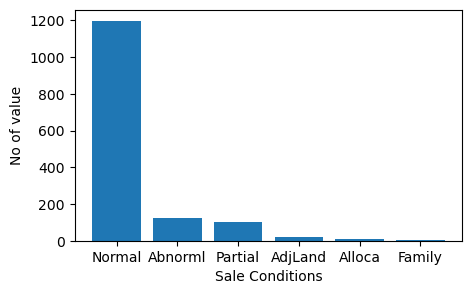

In [101]:
data = df['SaleCondition'].unique()

plt.figure(figsize=(5,3))
plt.bar(data, height=val_count)
plt.xlabel('Sale Conditions')
plt.ylabel('No of value')
plt.show()

#

<Axes: >

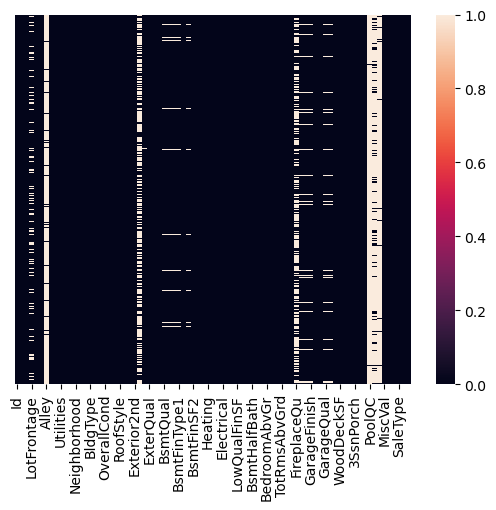

In [102]:
#plot null by using heatmap
sns.heatmap(df.isnull(),yticklabels=False )

In [103]:
#identify the categorical feature
cat_feature = [feature for feature in df.columns if df[feature].dtypes =='O']
print('length of categorical feature: ',len(cat_feature), '\n',cat_feature)

length of categorical feature:  43 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [104]:
#identify the numerical feature
num_feature =[feature for feature in df.columns if df[feature].dtypes !='O']
print('length of numerical feature: ',len(num_feature), '\n',num_feature)

length of numerical feature:  38 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


#

In [105]:
#find out null values in categorical feature
for feature in cat_feature:
    print('{}: {} missing value'.format(feature, df[feature].isnull().sum()))

MSZoning: 0 missing value
Street: 0 missing value
Alley: 1369 missing value
LotShape: 0 missing value
LandContour: 0 missing value
Utilities: 0 missing value
LotConfig: 0 missing value
LandSlope: 0 missing value
Neighborhood: 0 missing value
Condition1: 0 missing value
Condition2: 0 missing value
BldgType: 0 missing value
HouseStyle: 0 missing value
RoofStyle: 0 missing value
RoofMatl: 0 missing value
Exterior1st: 0 missing value
Exterior2nd: 0 missing value
MasVnrType: 872 missing value
ExterQual: 0 missing value
ExterCond: 0 missing value
Foundation: 0 missing value
BsmtQual: 37 missing value
BsmtCond: 37 missing value
BsmtExposure: 38 missing value
BsmtFinType1: 37 missing value
BsmtFinType2: 38 missing value
Heating: 0 missing value
HeatingQC: 0 missing value
CentralAir: 0 missing value
Electrical: 1 missing value
KitchenQual: 0 missing value
Functional: 0 missing value
FireplaceQu: 690 missing value
GarageType: 81 missing value
GarageFinish: 81 missing value
GarageQual: 81 missing

##### Below categorical features have null values need to be treate
- MasVnrType: 872 missing value
- BsmtQual: 37 missing value
- BsmtCond: 37 missing value
- BsmtExposure: 38 missing value
- BsmtFinType1: 37 missing value
- BsmtFinType2: 38 missing value
- Electrical: 1 missing value
- FireplaceQu: 690 missing value
- GarageType: 81 missing value
- GarageFinish: 81 missing value
- GarageQual: 81 missing value
- GarageCond: 81 missing value


###### These features have huge amount of null values
- Alley: 1369 missing value
- PoolQC: 1453 missing value
- Fence: 1179 missing value
- MiscFeature: 1406 missing value

In [106]:
df[cat_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#

In [107]:
# Here we are going to treat for null values

columns_to_drop =['Alley', 'PoolQC', 'Fence', 'MiscFeature']
# since ['Alley', 'PoolQC', 'Fence', 'MiscFeature'] having huge number of 
# missing values, here we are going to drop those from dataset
 
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'] , axis=1, inplace=True)


In [108]:
# Update new categorical feature list
cat_feature_new =[feature for feature in cat_feature if feature not in columns_to_drop]
len(cat_feature_new)

39

In [109]:
# Some of numerical features have less number of null values 
# Those null values will be replaced by Mode of particular feature
for feature in df[cat_feature_new]:
    #if feature not in large_null:
        df[feature]= df[feature].fillna(df[feature].mode()[0])
        
print(df[cat_feature_new].isnull().sum())

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [110]:
df.shape

(1460, 77)

In [111]:
df[cat_feature_new].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


#

In [112]:
#find out null values in numerical feature

for feature in num_feature:
    print('{}: {} missing value'.format(feature, df[feature].isnull().sum()))

Id: 0 missing value
MSSubClass: 0 missing value
LotFrontage: 259 missing value
LotArea: 0 missing value
OverallQual: 0 missing value
OverallCond: 0 missing value
YearBuilt: 0 missing value
YearRemodAdd: 0 missing value
MasVnrArea: 8 missing value
BsmtFinSF1: 0 missing value
BsmtFinSF2: 0 missing value
BsmtUnfSF: 0 missing value
TotalBsmtSF: 0 missing value
1stFlrSF: 0 missing value
2ndFlrSF: 0 missing value
LowQualFinSF: 0 missing value
GrLivArea: 0 missing value
BsmtFullBath: 0 missing value
BsmtHalfBath: 0 missing value
FullBath: 0 missing value
HalfBath: 0 missing value
BedroomAbvGr: 0 missing value
KitchenAbvGr: 0 missing value
TotRmsAbvGrd: 0 missing value
Fireplaces: 0 missing value
GarageYrBlt: 81 missing value
GarageCars: 0 missing value
GarageArea: 0 missing value
WoodDeckSF: 0 missing value
OpenPorchSF: 0 missing value
EnclosedPorch: 0 missing value
3SsnPorch: 0 missing value
ScreenPorch: 0 missing value
PoolArea: 0 missing value
MiscVal: 0 missing value
MoSold: 0 missing val

#### Below numerical features have null values
- LotFrontage: 259 missing value
- MasVnrArea: 8 missing value
- GarageYrBlt: 81 missing value

In [113]:
df[num_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [114]:
#Sort out numerical null features
num_null_col =[feature for feature in df[num_feature] if df[feature].isnull().sum()>1] 
print(num_null_col)

# Observe mean and mode of the num_null_col
print(df['LotFrontage'].mean())
print(df['MasVnrArea'].mean())

df['LotFrontage'] =df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']  =df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

#drop  df['GarageYrBlt'] 
df.drop(['GarageYrBlt'], axis=1, inplace=True)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
70.04995836802665
103.68526170798899


In [115]:
# drop Id column
df.drop(['Id'],axis=1, inplace=True)

<Axes: >

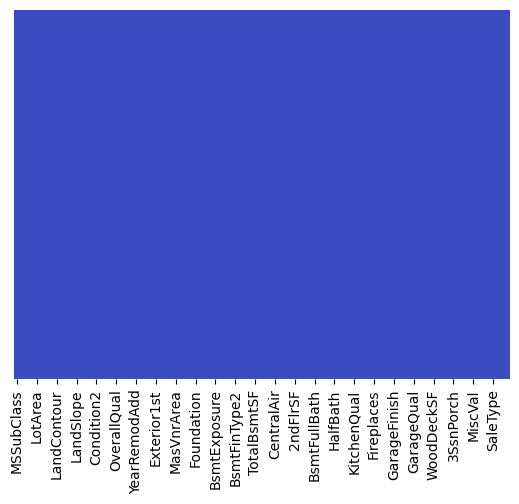

In [116]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

#

In [117]:
df.shape

(1460, 75)

# 

In [118]:
#import modified test dataset

df_test =pd.read_csv('formulatedtest.csv')

df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [119]:
df_test.shape

(1459, 74)

In [120]:
# Find inconsistancy

# Get the intersection of categorical features in both DataFrames
common_cat_features = set(df.columns).intersection(set(df_test.columns))

# Iterate over common categorical features and compare unique values
for feature in common_cat_features:
    if df[feature].dtype == 'O' and df_test[feature].dtype == 'O':  # Check if both are categorical features
        print('{}: '.format(feature))
        print('Unique values in df: ', df[feature].unique())
        print('Unique values in df_test_df: ', df_test[feature].unique())
        difference = len(df[feature].unique())-len(df_test[feature].unique())
        
        print('Difference of uniques: ',difference )
        print()  # Print an empty line for readability


Exterior1st: 
Unique values in df:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Unique values in df_test_df:  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'CBlock']
Difference of uniques:  2

GarageQual: 
Unique values in df:  ['TA' 'Fa' 'Gd' 'Ex' 'Po']
Unique values in df_test_df:  ['TA' 'Fa' 'Gd' 'Po']
Difference of uniques:  1

Street: 
Unique values in df:  ['Pave' 'Grvl']
Unique values in df_test_df:  ['Pave' 'Grvl']
Difference of uniques:  0

HouseStyle: 
Unique values in df:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Unique values in df_test_df:  ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
Difference of uniques:  1

BldgType: 
Unique values in df:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in df_test_df:  ['1Fam' 'TwnhsE' 'Twnhs' 'Duple

In [121]:
# There are no uniques values in the df_test where df not consist

### Handling Categorical varible

In [122]:
# filtering categorical features
columns = [feature for feature in common_cat_features if df[feature].dtype == 'O' and df_test[feature].dtype == 'O']
print(columns)
print('Length :',len(columns))

['Exterior1st', 'GarageQual', 'Street', 'HouseStyle', 'BldgType', 'BsmtFinType2', 'Condition2', 'LotShape', 'PavedDrive', 'SaleCondition', 'Neighborhood', 'RoofMatl', 'LotConfig', 'GarageCond', 'BsmtQual', 'MSZoning', 'SaleType', 'LandContour', 'CentralAir', 'HeatingQC', 'RoofStyle', 'BsmtFinType1', 'KitchenQual', 'Foundation', 'BsmtCond', 'MasVnrType', 'FireplaceQu', 'ExterCond', 'Exterior2nd', 'Condition1', 'Utilities', 'LandSlope', 'BsmtExposure', 'Electrical', 'Heating', 'Functional', 'GarageType', 'ExterQual', 'GarageFinish']
Length : 39


In [123]:
#Concatenate train and test data
final_df= pd.concat([df, df_test], axis=0)

In [124]:
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [125]:
final_df.shape

(2919, 75)

In [126]:
print(final_df['SalePrice'])

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64


In [127]:
#handle categorical features usin one hot encodeing

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [128]:
final_df= category_onehot_multcols(columns)

Exterior1st
GarageQual
Street
HouseStyle
BldgType
BsmtFinType2
Condition2
LotShape
PavedDrive
SaleCondition
Neighborhood
RoofMatl
LotConfig
GarageCond
BsmtQual
MSZoning
SaleType
LandContour
CentralAir
HeatingQC
RoofStyle
BsmtFinType1
KitchenQual
Foundation
BsmtCond
MasVnrType
FireplaceQu
ExterCond
Exterior2nd
Condition1
Utilities
LandSlope
BsmtExposure
Electrical
Heating
Functional
GarageType
ExterQual
GarageFinish


In [129]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Fa,Gd,Po,TA,Pave,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,2fmCon,Duplex,Twnhs,TwnhsE,BLQ,GLQ,LwQ,Rec,Unf,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,IR2,IR3,Reg,P,Y,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,CulDSac,FR2,FR3,Inside,Fa,Gd,Po,TA,Fa,Gd,TA,FV,RH,RL,RM,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,HLS,Low,Lvl,Y,Fa,Gd,Po,TA,Gable,Gambrel,Hip,Mansard,Shed,BLQ,GLQ,LwQ,Rec,Unf,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Gd,Po,TA,BrkFace,Stone,Fa,Gd,Po,TA,Fa,Gd,Po,TA,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,NoSeWa,Mod,Sev,Gd,Mn,No,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,Fa,Gd,TA,RFn,Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,

In [130]:
final_df.shape

(2919, 235)

In [131]:
#Drop the duplicated columns in final df
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [132]:
final_df.shape

(2919, 175)

#

In [133]:
#split train test data from final_df

train_df =final_df.iloc[:1460,:]
test_df =final_df.iloc[1460: ,:]

In [134]:
print('Shape of train:',train_df.shape, '\nShape of test:',test_df.shape)

Shape of train: (1460, 175) 
Shape of test: (1459, 175)


In [140]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Fa,Gd,Po,TA,Pave,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,2fmCon,Duplex,Twnhs,TwnhsE,BLQ,GLQ,LwQ,Rec,Unf,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,IR2,IR3,Reg,P,Y,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,CulDSac,FR2,FR3,Inside,FV,RH,RL,RM,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,HLS,Low,Lvl,Gable,Gambrel,Hip,Mansard,Shed,PConc,Slab,Wood,Brk Cmn,CmentBd,Other,Wd Shng,RRNe,NoSeWa,Mod,Sev,Mn,No,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,

In [136]:
train_df.tail(100)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Fa,Gd,Po,TA,Pave,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,2fmCon,Duplex,Twnhs,TwnhsE,BLQ,GLQ,LwQ,Rec,Unf,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,IR2,IR3,Reg,P,Y,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,CulDSac,FR2,FR3,Inside,FV,RH,RL,RM,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,HLS,Low,Lvl,Gable,Gambrel,Hip,Mansard,Shed,PConc,Slab,Wood,Brk Cmn,CmentBd,Other,Wd Shng,RRNe,NoSeWa,Mod,Sev,Mn,No,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn
1360,70,51.000000,9842,5,6,1921,1998,0.0,0.0,0.0,612.0,612.0,990,1611,0,2601,0.0,0.0,3,1,4,1,8,0,2.0,621.0,183,0,301,0,0,0,0,5,2008,189000.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True
1361,20,124.000000,16158,7,5,2005,2005,16.0,1274.0,0.0,256.0,1530.0,1530,0,0,1530,1.0,0.0,2,0,3,1,7,1,2.0,430.0,168,36,0,0,0,0,0,6,2009,260000.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1362,50,70.049958,12513,4,4,1920,2007,0.0,0.0,0.0,715.0,715.0,1281,457,0,1738,0.0,0.0,2,0,4,1,7,1,1.0,368.0,55,0,0,0,0,0,0,6,2009,104900.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False

In [138]:
# Drop the sales price fron test_df
X_test =test_df.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9432\316237152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test =test_df.drop(['SalePrice'], axis=1, inplace=True)


In [141]:
test_df.shape

(1459, 174)

In [142]:
#Define X_train(independance variables) and y_test(dependaent variables) for train_df 

X_train = train_df.drop(['SalePrice'], axis=1)
y_train  = train_df['SalePrice']

In [143]:
print(train_df.shape , X_train.shape, y_train.shape)

(1460, 175) (1460, 174) (1460,)


#

## Predicting and selecting the Algorithm

#

In [144]:
import xgboost
classifier =xgboost.XGBRegressor()

classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
import pickle
filename ='finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [148]:
y_pred =classifier.predict(test_df)

In [149]:
y_pred

array([123619.016, 161513.92 , 194114.19 , ..., 158708.78 , 100379.76 ,
       227543.16 ], dtype=float32)

In [150]:
#Create sample submission files
pred =pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets =pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'